In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from luwiji.knn import illustration, demo

In [2]:
df=pd.read_csv("titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(columns=["Name", "Ticket"], inplace=True)

# Quick Exploratory Data Analysis (EDA)

In [4]:
df.isnull() # Cek data yang kosong kemudian didrop atau di isi

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False
889,False,False,False,True,False,False,False,True,False


In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: ylabel='PassengerId'>

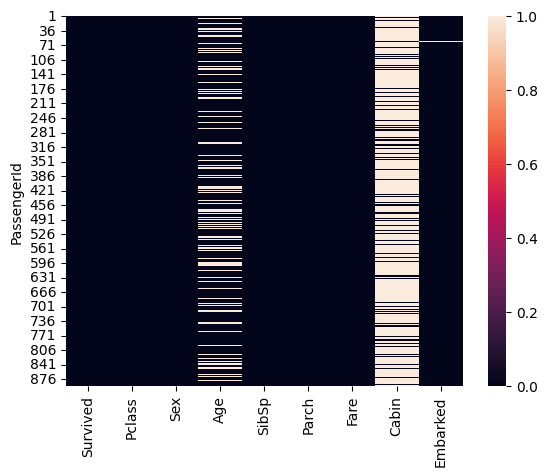

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())

In [7]:
df.drop(columns=['Age', 'Cabin'], inplace=True)

In [8]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
df.fillna({"Embarked":"S"}, inplace=True)

<Axes: ylabel='PassengerId'>

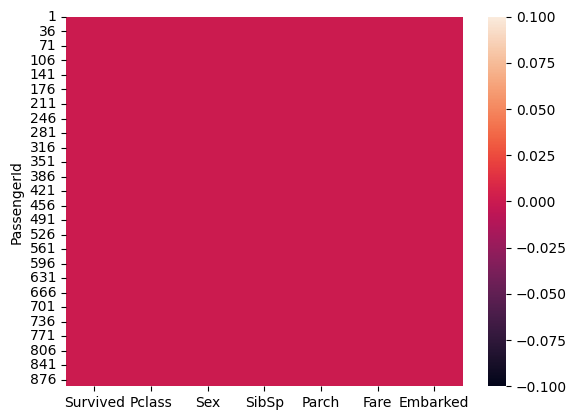

In [10]:
sns.heatmap(df.isnull())

# Persiapan Data Untuk Model

In [11]:
X= df.drop(columns="Survived") #input/feature yang dimasukan ke model (adalah semua kategori selain survived)
y= df.Survived #target

X=pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"]) #untuk mengubah data kategorikal menjadi numerikal

X

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,False,False,True,False,True,False,False,True
2,1,0,71.2833,True,False,False,True,False,True,False,False
3,0,0,7.9250,False,False,True,True,False,False,False,True
4,1,0,53.1000,True,False,False,True,False,False,False,True
5,0,0,8.0500,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,13.0000,False,True,False,False,True,False,False,True
888,0,0,30.0000,True,False,False,True,False,False,False,True
889,1,2,23.4500,False,False,True,True,False,False,False,True


# Melakukan pemodelan dengan Knn menggunakan Scikit-learn

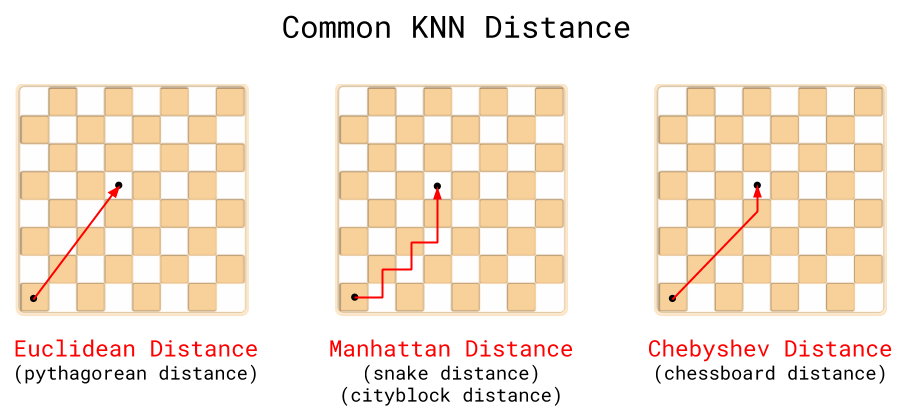

In [4]:
from sklearn.neighbors import KNeighborsClassifier
illustration.knn_distance

In [5]:
demo.knn()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=-5.0, desc…

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.score(X,y)

0.8787878787878788

In [15]:
# menggunakan pemodelan di atas tidak cukup, karena kita harus cek apakah sebenarnya prediksinya benar dengan data tes (seperti ujian)

# Dataset Splitting

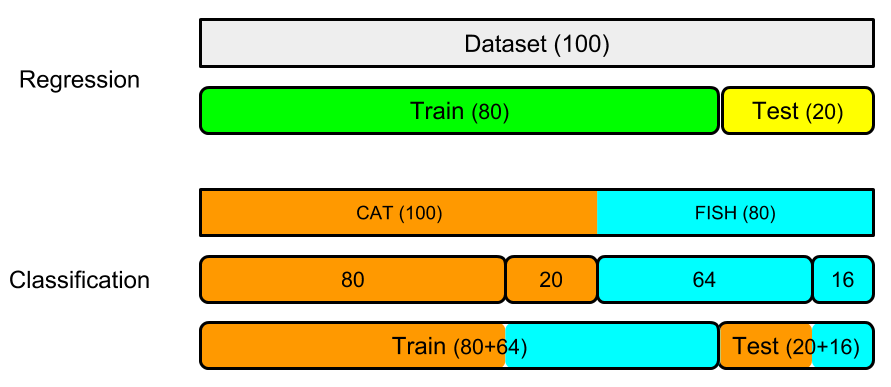

In [16]:
from sklearn.model_selection import train_test_split
illustration.train_test_split

In [17]:
X= df.drop(columns="Survived") #input/feature yang dimasukan ke model (adalah semua kategori selain survived)
y= df.Survived #target

X=pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #untuk clasifikasi ini menggunakan statify split

X_train.shape, X_test.shape, y_train.shape, y_test.shape # cek apakah data test terlalu sedikit

((712, 11), (179, 11), (712,), (179,))

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9101123595505618, 0.7262569832402235)

# K-fold Cross Validation

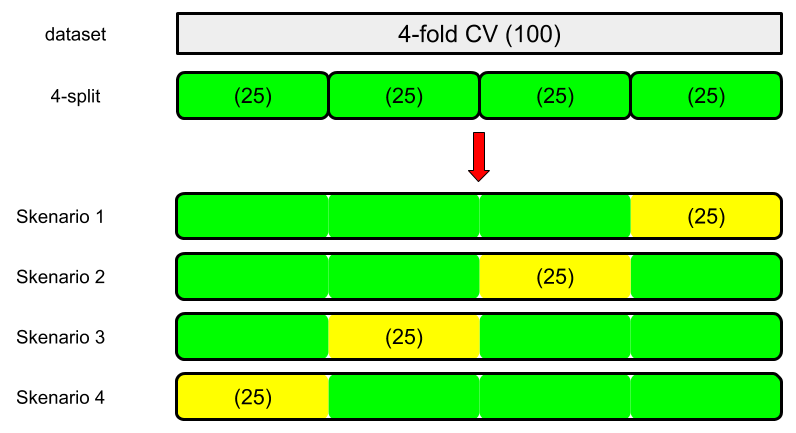

In [20]:
from sklearn.model_selection import cross_val_score
illustration.kfold_cv

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, X, y, cv=5) #cv berapa fold (lipatan)

array([0.63687151, 0.63483146, 0.80337079, 0.73033708, 0.71348315])

In [22]:
cross_val_score(knn, X, y, cv=5).mean()

0.703778796058

# Improvement melalui data: Feature Scaling

In [23]:
#masalah pada knn bisa karena orde. Misal ada data hubungan antara jumlah anak dan gaji. jika dicari distance nya maka ini akan terlalu jauh karena orde gaji yang terlalu tinggi, makanya perlu feature scaling

from sklearn.preprocessing import MinMaxScaler

In [3]:
demo.knn_scaling()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=7000000.0,…

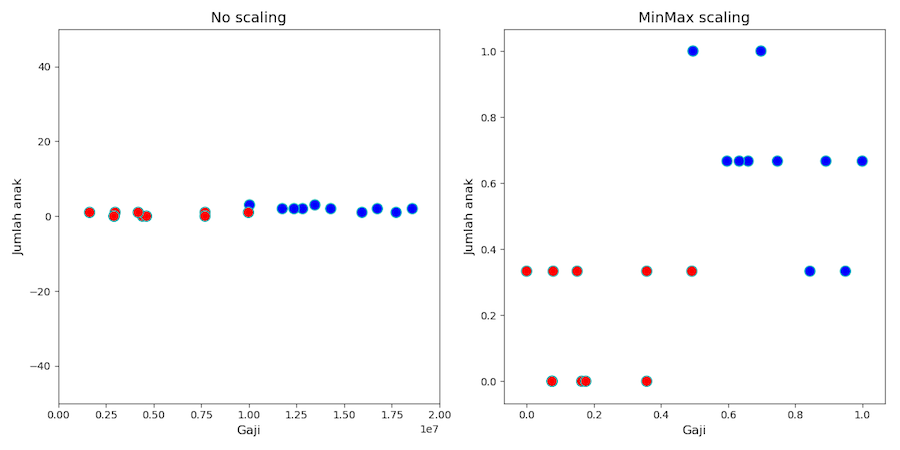

In [4]:
illustration.knn_scaling

In [24]:
#mencari nilai max dan min
scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler()

In [25]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.8890449438202247, 0.6983240223463687)

# Improvement melalui Model: Parameter Tuning

In [28]:
# tuning jumlah neigbor tanpa scaling

neighbor =range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))


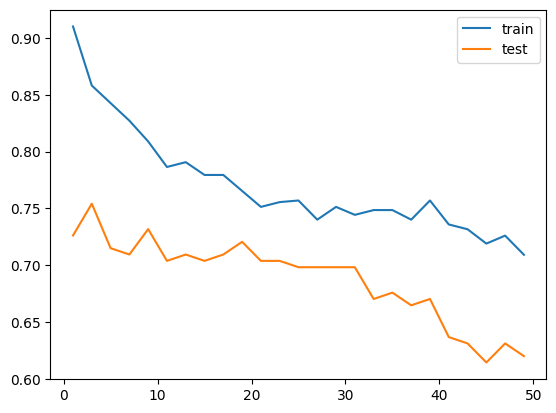

In [29]:
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

In [30]:
print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7541899441340782
n_neighbor: 3


Max test score: 0.7988826815642458
n_neighbor: 29


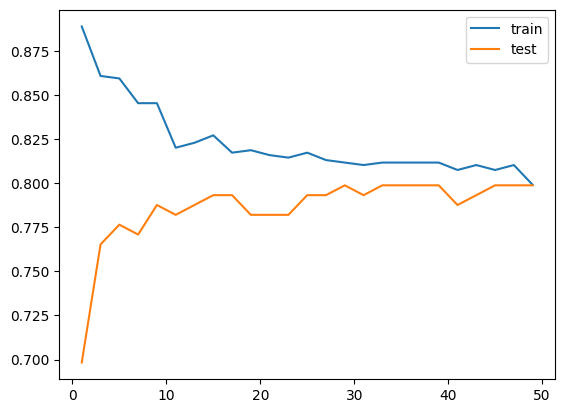

In [31]:
# tuning jumlah neighbor menggunakan scaling
neighbor =range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

Max test score: 0.7932960893854749
n_neighbor: 23


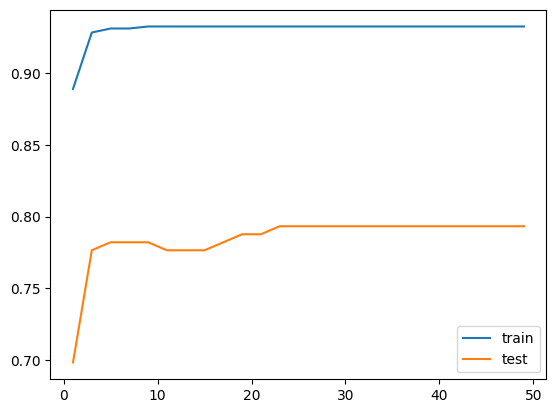

In [32]:
# menggunkana weighting dan metode jarak yg berbeda
neighbor =range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", p=1)
    knn.fit(X_train_scaled, y_train)

    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

# Avoid Data Leakage

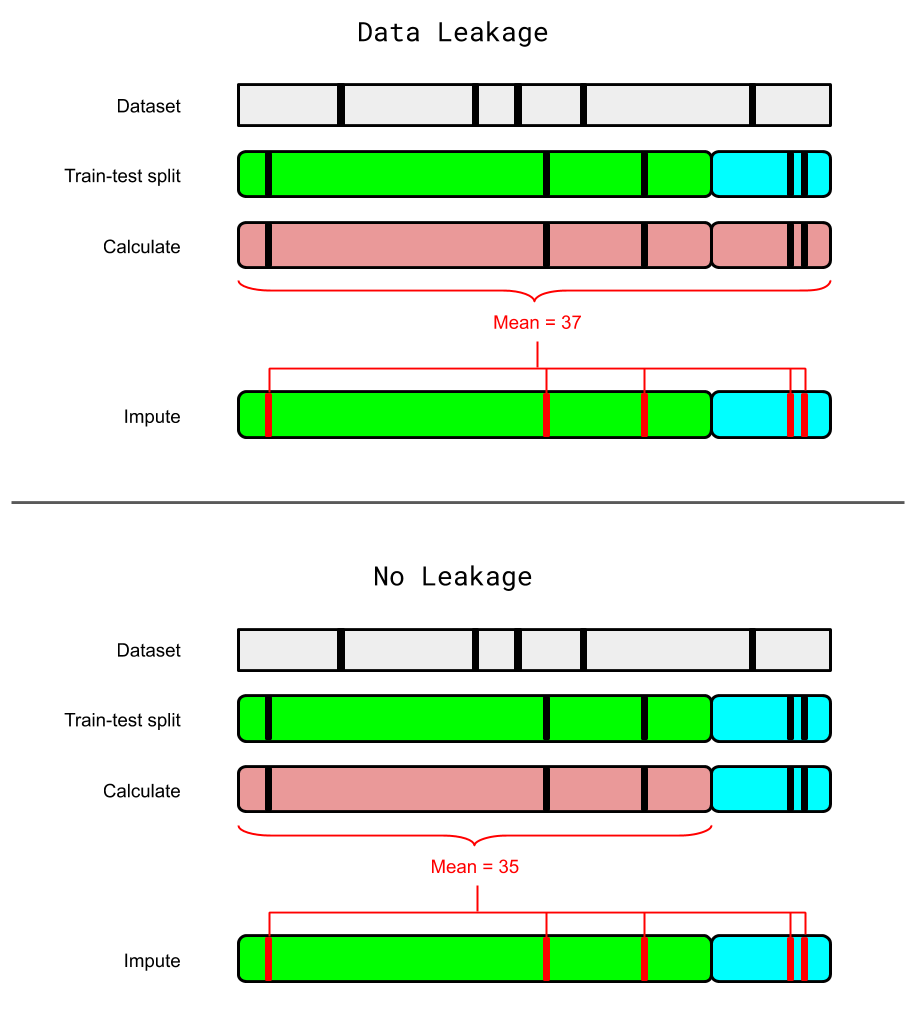

In [33]:
illustration.data_leakage

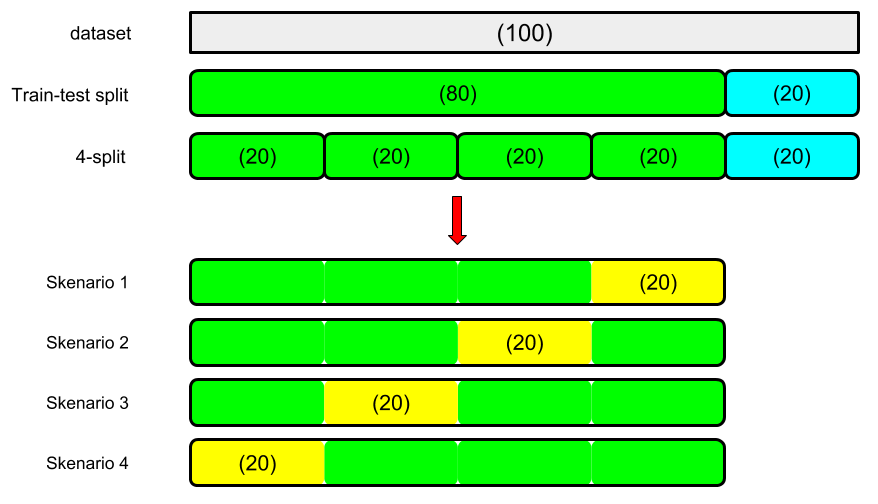

In [34]:
# Train- val- test split
illustration.train_val_test

In [35]:
# test nya di pisah dari awal, mesin tidak pernah melihat soal test, tidak ada pemisahan k-fold di soal test. Hanya remedial di quiz

import pandas as pd
from sklearn.model_selection import train_test_split

In [36]:
#Menyiapkan data

df = pd.read_csv("titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Age","Cabin"], inplace=True)
                 
X= df.drop(columns="Survived") #input/feature yang dimasukan ke model (adalah semua kategori selain survived)
y= df.Survived #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #untuk clasifikasi ini menggunakan statify split

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [37]:
#Preprocessor

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [38]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
    ])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder())
    ])

In [39]:
from sklearn.compose import ColumnTransformer

In [40]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
693,3,male,0,0,56.4958,S
482,2,male,0,0,0.0000,S
528,1,male,0,0,221.7792,S
856,3,female,0,1,9.3500,S
802,2,female,1,1,26.2500,S


In [41]:
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline,["SibSp", "Parch","Fare"]),
    ("categoric", categorical_pipeline,["Pclass", "Sex","Embarked"])
])

In [42]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

# Tuning dan Cross Validation dengan GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameter = {
    "algo__n_neighbors": range(1,51,2),
    "algo__weights":["uniform","distance"],
    "algo__p":[1,2] #manhatan sama euclidian
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose= 1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': range(1, 51, 2),
                         'algo__p': [1, 2],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

In [50]:
pd.DataFrame(model.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__n_neighbors,param_algo__p,param_algo__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
40,0.044684,0.001262,0.078022,0.002141,21,1,uniform,"{'algo__n_neighbors': 21, 'algo__p': 1, 'algo_...",0.815126,0.818565,0.810127,0.814606,0.003465,1
36,0.043348,0.008363,0.086187,0.025009,19,1,uniform,"{'algo__n_neighbors': 19, 'algo__p': 1, 'algo_...",0.815126,0.818565,0.805907,0.813200,0.005344,2
24,0.058337,0.015108,0.069006,0.003742,13,1,uniform,"{'algo__n_neighbors': 13, 'algo__p': 1, 'algo_...",0.819328,0.810127,0.810127,0.813194,0.004337,3
28,0.043336,0.006237,0.077342,0.006129,15,1,uniform,"{'algo__n_neighbors': 15, 'algo__p': 1, 'algo_...",0.819328,0.810127,0.810127,0.813194,0.004337,3
38,0.045669,0.011615,0.075010,0.007122,19,2,uniform,"{'algo__n_neighbors': 19, 'algo__p': 2, 'algo_...",0.815126,0.814346,0.805907,0.811793,0.004174,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.040023,0.002436,0.024850,0.005503,3,1,distance,"{'algo__n_neighbors': 3, 'algo__p': 1, 'algo__...",0.760504,0.734177,0.751055,0.748579,0.010890,95
3,0.045851,0.012133,0.025350,0.004186,1,2,distance,"{'algo__n_neighbors': 1, 'algo__p': 2, 'algo__...",0.752101,0.683544,0.772152,0.735932,0.037938,97
2,0.044014,0.006123,0.070533,0.006728,1,2,uniform,"{'algo__n_neighbors': 1, 'algo__p': 2, 'algo__...",0.752101,0.683544,0.772152,0.735932,0.037938,97
1,0.057003,0.019201,0.048687,0.020732,1,1,distance,"{'algo__n_neighbors': 1, 'algo__p': 1, 'algo__...",0.747899,0.683544,0.763713,0.731719,0.034671,99


In [51]:
model.best_params_

{'algo__n_neighbors': 21, 'algo__p': 1, 'algo__weights': 'uniform'}

In [52]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8174157303370787, 0.7821229050279329)